Importing the US NASDAQ stock data from "www.centralcharts.com" of all the stocks listed with following information:
1. Name
2. Current Price
3. % change
4. Opening
5. Heighest Price
6. Lowest Price
7. Volume

##This data is dynamic in nature, it may vary from the snapshots provided in the report.

In [12]:
# import library
""" Request library to requst data from the site
Beautifulsoup library to do interact with HTML
tabilate library to present table in a structured way"""

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tabulate import tabulate
from datetime import datetime
import time


start_time = time.time()

# Create a list that contains the URL for each page.
pages = []

# There are 155 pages in the entire set.
for page_number in range(1, 155):
    url_start = 'https://www.centralcharts.com/en/price-list-ranking/'
    url_end = 'ALL/asc/ts_19-us-nasdaq-stocks--qc_1-alphabetical-order?p='
    url = url_start + url_end + str(page_number)
    pages.append(url)

# Here is the home page URL for reference:
# https://www.centralcharts.com/en/price-list-ranking/ALL/asc/ts_19-us-nasdaq-stocks--qc_1-alphabetical-order?p=1

# Create a list containing the <th> tag contents.
webpage = requests.get(pages[0])
soup = bs(webpage.text, 'html.parser')
stock_table = soup.find('table', class_='tabMini tabQuotes')
th_tag_list = stock_table.find_all('th')


# Take the <th> list and remove the extra attributes to
# get just the text portion of each tag. Use this text for the
# column header labels in the dataframe.
headers = []
for each_tag in th_tag_list:
    title = each_tag.text
    headers.append(title)

headers[0] = 'Name'

new_headers = []
for header in headers:
    if header not in ('Cap.', 'Issued Cap.', ''):
        new_headers.append(header)
headers = new_headers
stock_df = pd.DataFrame(columns = headers)

# Cycle through each page.
for page in pages:
    webpage = requests.get(page)
    soup = bs(webpage.text, 'html.parser')

    # Check to see if the page contains a table. If it does,
    # create a list of <tr> tags. If not, go to the next page.
    if soup.find('table'):
        stock_table = soup.find('table', class_='tabMini tabQuotes')
        tr_tag_list = stock_table.find_all('tr')

        # Cycle through the <tr> list. For each
        # row, find the <td> tags within the row. Then
        # obtain the text within each <td> tag. Lastly,
        # place the text in the last row of the dataframe.
        for each_tr_tag in tr_tag_list[1:]:
            td_tag_list = each_tr_tag.find_all('td')

            row_values = []
            for each_td_tag in td_tag_list[0:7]:
                new_value = each_td_tag.text.strip()
                row_values.append(new_value)

            stock_df.loc[len(stock_df)] = row_values

# Change the data types & sort by trading volume
stock_df[['Name', 'Current price', 'Change(%)', 'Open','High', 'Low']] = \
    stock_df[['Name', 'Current price', 'Change(%)', 'Open', 'High', 'Low']] \
    .astype(str)

stock_df.replace({'Current price': {',':'', '-':'1'},
                  'Change(%)': {',':'', '-':'1', '%':''},
                  'Open': {',':'', '-':'1'},
                  'High': {',':'', '-':'1'},
                  'Low': {',':'', '-':'1'},
                  'Volume': {',':'', '-':'1'}
}, regex=True, inplace=True)

stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']] = \
    stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']]. \
    apply(pd.to_numeric)

stock_df = stock_df.sort_values(by=['Volume'], ascending=False)

# Sort the DataFrame by 'Volume' in descending order
stock_df = stock_df.sort_values(by=['Volume'], ascending=False)

# Convert the DataFrame to a nicely formatted table
table = tabulate(stock_df, headers='keys', tablefmt='pretty')

# Print the table
print(table)




+------+-----------------------------------------+---------------+-----------+---------+---------+---------+-----------+
|      |                  Name                   | Current price | Change(%) |  Open   |  High   |   Low   |  Volume   |
+------+-----------------------------------------+---------------+-----------+---------+---------+---------+-----------+
| 460  |           AXCELLA HEALTH INC.           |     0.98      |   70.73   |  0.61   |  1.07   |  0.535  | 158129337 |
| 2569 |              NIKOLA CORP.               |     0.88      |  115.38   |  1.03   |  1.03   |  0.88   | 150684908 |
| 722  |           CANOPY GROWTH CORP.           |     0.932     |   22.63   |  0.751  |  0.959  |  0.74   | 122823362 |
| 3539 |               TESLA INC.                |     248.5     |   11.19   | 251.22  | 256.52  | 246.67  | 118559635 |
| 544  |              BIOCEPT INC.               |     1.34      |   59.52   |  1.58   |  1.85   |  1.22   | 103239842 |
| 1343 |            EZGO TECHNOL

COMPUTING THE STATISTICAL SUMMARY OF ALL THE DATA IN WHICH MEAN, MEDIAN, STANDARD DEVIATION, MINIMUM, 25%, 50%, 75% AND MAXIMUM IS CALCULATED

In [13]:
import pandas as pd


# Calculate summary statistics
summary_stats_price = stock_df['Current price'].describe()
summary_stats_open = stock_df['Open'].describe()
summary_stats_high = stock_df['High'].describe()
summary_stats_low = stock_df['Low'].describe()
summary_stats_volume = stock_df['Volume'].describe()
# Creating table of 4 different summary statistics
table1 = pd.DataFrame(summary_stats_price)
table2 = pd.DataFrame(summary_stats_open)
table3 = pd.DataFrame(summary_stats_high)
table4 = pd.DataFrame(summary_stats_low)
table5 = pd.DataFrame(summary_stats_volume)
print(table1)
# Combining these 4 tables into 1 single table
combined_table = pd.concat([table1, table2, table3, table4, table5], axis = 1)
combined_table.reset_index(drop=True, inplace=True)
print(combined_table)

       Current price
count    4015.000000
mean       26.305854
std        83.047274
min         0.022000
25%         2.235000
50%        10.370000
75%        21.210000
max      3143.100000
   Current price         Open         High          Low        Volume
0    4015.000000  4015.000000  4015.000000  4015.000000  4.015000e+03
1      26.305854    26.375189    26.673269    26.034723  9.721895e+05
2      83.047274    82.935247    83.759414    82.371217  6.126921e+06
3       0.022000     0.020000     0.024000     0.012000  1.000000e+00
4       2.235000     2.290000     2.345000     2.155000  1.019750e+04
5      10.370000    10.360000    10.410000    10.310000  7.506800e+04
6      21.210000    21.165000    21.495000    20.855000  3.903920e+05
7    3143.100000  3115.000000  3147.940000  3108.430000  1.581293e+08


COMPUTING MEAN(AVERAGE) OF THE DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [23]:
# Computing mean of current price, open price, high price and low price
# By extracting relevant columns from the dataset above, we have calculated mean
mean_price = stock_df['Current price'].mean()
mean_Open = stock_df['Open'].mean()
mean_High = stock_df['High'].mean()
mean_Low = stock_df['Low'].mean()
mean_Volume = stock_df['Volume'].mean()
print("Mean current price:", mean_price)
print("Mean Open:", mean_Open)
print("Mean High:", mean_High)
print("Mean Low:", mean_Low)
print("Mean Volume:", mean_Volume)

Mean current price: 26.305853798256535
Mean Open: 26.375189290161895
Mean High: 26.67326924034869
Mean Low: 26.034722789539227
Mean Volume: 972189.4679950187


CALCULATING MEDIAN OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [24]:
# Computing median of current price, open price, high price and low price
# By extracting relevant columns from the dataset above, we have calculated median
median_price = stock_df['Current price'].median()
median_Open = stock_df['Open'].median()
median_High = stock_df['High'].median()
median_Low = stock_df['Low'].median()
median_Volume = stock_df['Volume'].median()
print("Median current price:", median_price)
print("Median Open:", median_Open)
print("Median High:", median_High)
print("Median Low:", median_Low)
print("Median Volume:", median_Volume)

Median current price: 10.37
Median Open: 10.36
Median High: 10.41
Median Low: 10.31
Median Volume: 75068.0


CALCULATING MODE OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [25]:
# Computing mode of current price, open price, high price and low price
# By extracting relevant columns from the dataset above, we have calculated mode
mode_price = stock_df['Current price'].mode()
mode_open = stock_df['Open'].mode()
mode_high = stock_df['High'].mode()
mode_low = stock_df['Low'].mode()
mode_volume = stock_df['Volume'].mode()

# If there are multiple modes, mode() returns a Series. You can convert it to a list.
mode_price_list = mode_price.tolist()
mode_open_list = mode_open.tolist()
mode_high_list = mode_high.tolist()
mode_low_list = mode_low.tolist()
mode_volume_list = mode_volume.tolist()

# Print the result
print("Mode of Price:", mode_price_list)
print("Mode of Open:", mode_open_list)
print("Mode of High:", mode_high_list)
print("Mode of Low:", mode_low_list)
print("Mode of Volume:", mode_volume_list)


Mode of Price: [10.9]
Mode of Open: [10.9]
Mode of High: [10.55, 11.0]
Mode of Low: [10.55, 10.75]
Mode of Volume: [100]


CALCULATING MAXIMUM AMOUNTS OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [26]:
# Computing maximum amounts of current price, open price, high price and low price
# By extracting relevant columns from the daataset above, we have calculated maximum amounts
maximum_price = stock_df['Current price'].max()
maximum_open = stock_df['Open'].max()
maximum_high = stock_df['High'].max()
maximum_low = stock_df['Low'].max()
maximum_volume = stock_df['Volume'].max()
print("Maximum current price:", maximum_price)
print("Maximum Open:", maximum_open)
print("Maximum High:", maximum_high)
print("Maximum Low:", maximum_low)
print("Maximum Volume:", maximum_volume)

Maximum current price: 3143.1
Maximum Open: 3115.0
Maximum High: 3147.94
Maximum Low: 3108.43
Maximum Volume: 158129337


CALCULATING MINIMUM AMOUNTS OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [27]:
# Computing minimum amounts of current price, open price, high price and low price
# By extracting relevant columns from the daataset above, we have calculated minimum amounts
minimum_price = stock_df['Current price'].min()
minimum_open = stock_df['Open'].min()
minimum_high = stock_df['High'].min()
minimum_low = stock_df['Low'].min()
minimum_volume = stock_df['Volume'].min()
print("Minimum Current price:", minimum_price)
print("Minimum Open:", minimum_open)
print("Minimum High:", minimum_high)
print("Minimum Low:", minimum_low)
print("Minimum Volume:", minimum_volume)

Minimum Current price: 0.022
Minimum Open: 0.02
Minimum High: 0.024
Minimum Low: 0.012
Minimum Volume: 1


CALCULATING STANDARD DEVIATION OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [28]:
# Computing standard deviation of current price, open price, high price and low price
# By extracting relevant columns from the daataset above, we have calculated standard deviation
import numpy as np
std_dev_price = np.std(stock_df['Current price'])
std_dev_open = np.std(stock_df['Open'])
std_dev_high = np.std(stock_df['High'])
std_dev_low = np.std(stock_df['Low'])
std_dev_volume = np.std(stock_df['Volume'])
print("Standard Deviation of Price:", std_dev_price)
print("Standard Deviation of Open:", std_dev_open)
print("Standard Deviation of High:", std_dev_high)
print("Standard Deviation of Low:", std_dev_low)
print("Standard Deviation of Volume:", std_dev_volume)

Standard Deviation of Price: 83.03693171905716
Standard Deviation of Open: 82.92491768369058
Standard Deviation of High: 83.74898300660186
Standard Deviation of Low: 82.36095859000564
Standard Deviation of Volume: 6126157.598505482


CALCULATING VARIANCE OF DIFFERENT INFORMATION I.E., CURRENT PRICE, OPEN, HIGH, LOW AND VOLUME OF ALL THE LISTED SHARES

In [29]:
variance_of_price = np.var(stock_df['Current price'])
variance_of_open = np.var(stock_df['Open'])
variance_of_high = np.var(stock_df['High'])
variance_of_low = np.var(stock_df['Low'])
variance_of_volume = np.var(stock_df['Volume'])
print("Variance of Price:", variance_of_price)
print("Variance of Open:", variance_of_open)
print("Variance of High:", variance_of_high)
print("Variance of Low:", variance_of_low)
print("Variance of Volume:", variance_of_volume)

Variance of Price: 6895.132029315362
Variance of Open: 6876.54197284686
Variance of High: 7013.892154640087
Variance of Low: 6783.327499864624
Variance of Volume: 37529806921726.46


CALCULATING CO-EFFICIENT OF CURRENT PRICE AND VOLUME OF THE GIVEN DATA



In [30]:
import pandas as pd
import statsmodels.api as sm

# Data
data = pd.DataFrame({
    'y': stock_df['Volume'],
    'X': stock_df['Current price']
})

# Fit a linear regression model
X = sm.add_constant(data['X'])  # Add a constant (intercept) term
model = sm.OLS(data['y'], X).fit()  # Fit the linear regression model

# Get the coefficient
coefficient = model.params['X']

# Print the coefficient
print(f"Coefficient of X: {coefficient:.4f}")


Coefficient of X: 2450.8014


MAKING THE BOX-PLOT OF CHANGE% AND CALCULATING NUMBER OF OUTLIERS



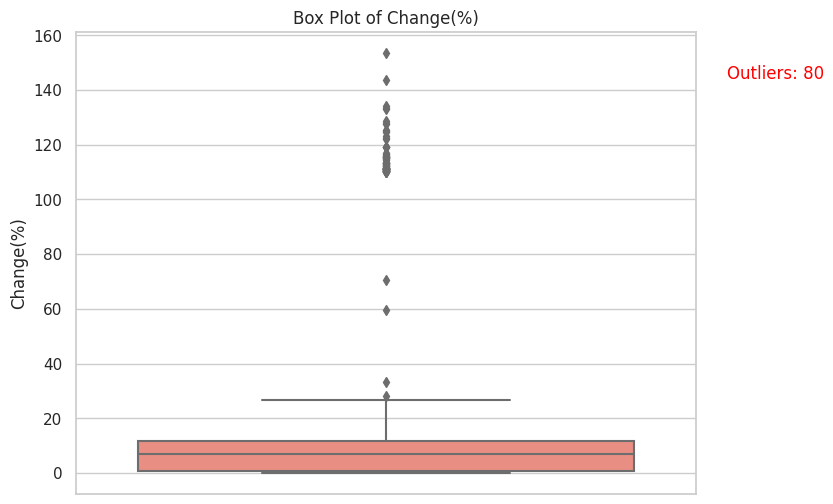

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Change(%)' column
ax = sns.boxplot(y=stock_df['Change(%)'], color='salmon')

# Calculate the number of outliers
q1 = stock_df['Change(%)'].quantile(0.25)
q3 = stock_df['Change(%)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_count = ((stock_df['Change(%)'] < lower_bound) | (stock_df['Change(%)'] > upper_bound)).sum()

# Set the y-axis label
plt.ylabel('Change(%)')

# Set the title for the box plot
plt.title('Box Plot of Change(%)')

# Add the count of outliers to the plot
ax.text(1.05, 0.9, f'Outliers: {outliers_count}', transform=ax.transAxes, fontsize=12, color='red')

# Show the box plot
plt.show()

MAKING THE BOX-PLOT OF CURRENT PRICE AND CALCULATING NUMBER OF OUTLIERS

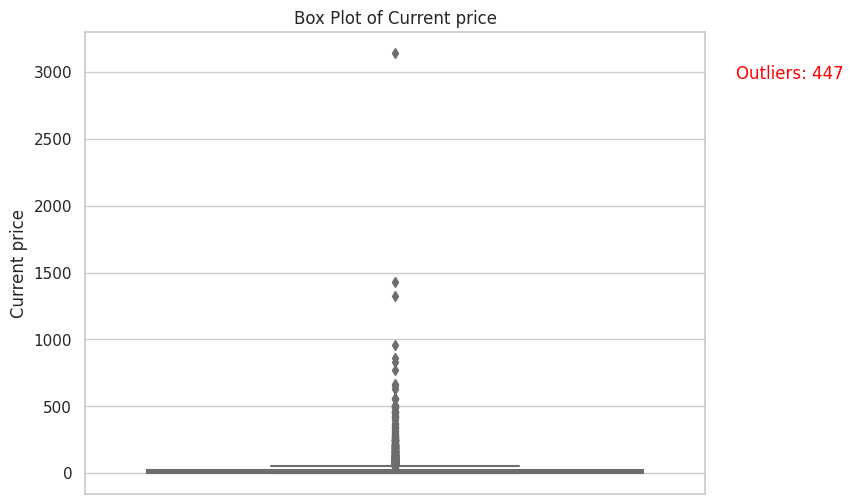

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Current price' column
ax = sns.boxplot(y=stock_df['Current price'], color='salmon')

# Calculate the number of outliers
q1 = stock_df['Current price'].quantile(0.25)
q3 = stock_df['Current price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_count = ((stock_df['Current price'] < lower_bound) | (stock_df['Current price'] > upper_bound)).sum()

# Set the y-axis label
plt.ylabel('Current price')

# Set the title for the box plot
plt.title('Box Plot of Current price')

# Add the count of outliers to the plot
ax.text(1.05, 0.9, f'Outliers: {outliers_count}', transform=ax.transAxes, fontsize=12, color='red')

# Show the box plot
plt.show()

MAKING THE BOX-PLOT OF VOLUME AND CALCULATING NUMBER OF OUTLIERS

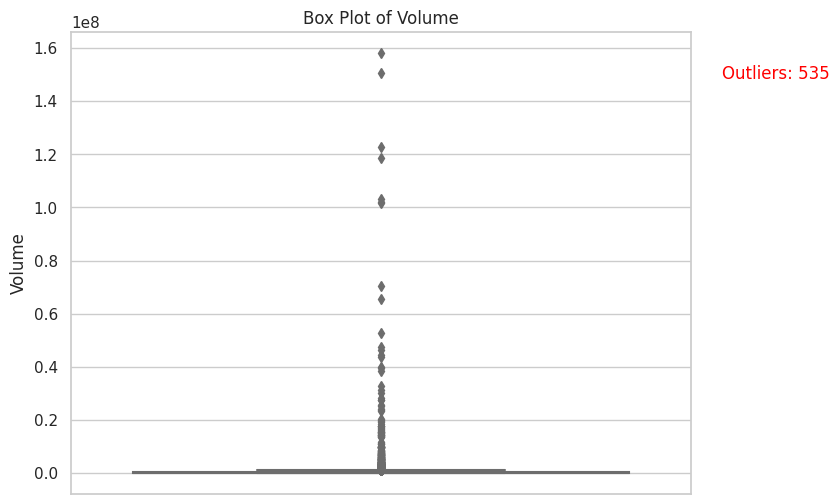

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Volume' column
ax = sns.boxplot(y=stock_df['Volume'], color='salmon')

# Calculate the number of outliers
q1 = stock_df['Volume'].quantile(0.25)
q3 = stock_df['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_count = ((stock_df['Volume'] < lower_bound) | (stock_df['Volume'] > upper_bound)).sum()

# Set the y-axis label
plt.ylabel('Volume')

# Set the title for the box plot
plt.title('Box Plot of Volume')

# Add the count of outliers to the plot
ax.text(1.05, 0.9, f'Outliers: {outliers_count}', transform=ax.transAxes, fontsize=12, color='red')

# Show the box plot
plt.show()

MAKING THE HISTOGRAM OF CHANGE(%) WITH RESPECTIVE FREQUENCIES

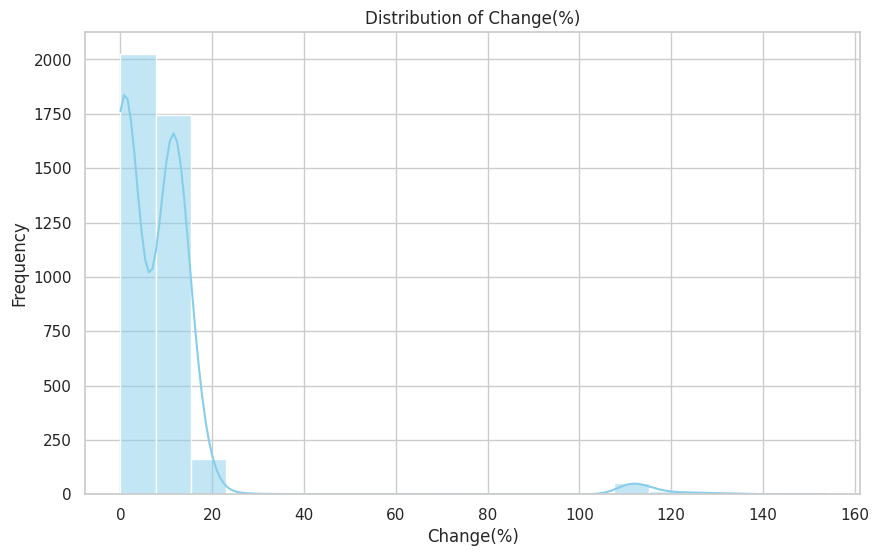

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a histogram of 'Change(%)'
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['Change(%)'], bins=20, kde=True, color='skyblue')
plt.xlabel('Change(%)')
plt.ylabel('Frequency')
plt.title('Distribution of Change(%)')
plt.show()



MAKING THE HISTOGRAM OF CURRENT PRICE WITH RESPECTIVE FREQUENCIES

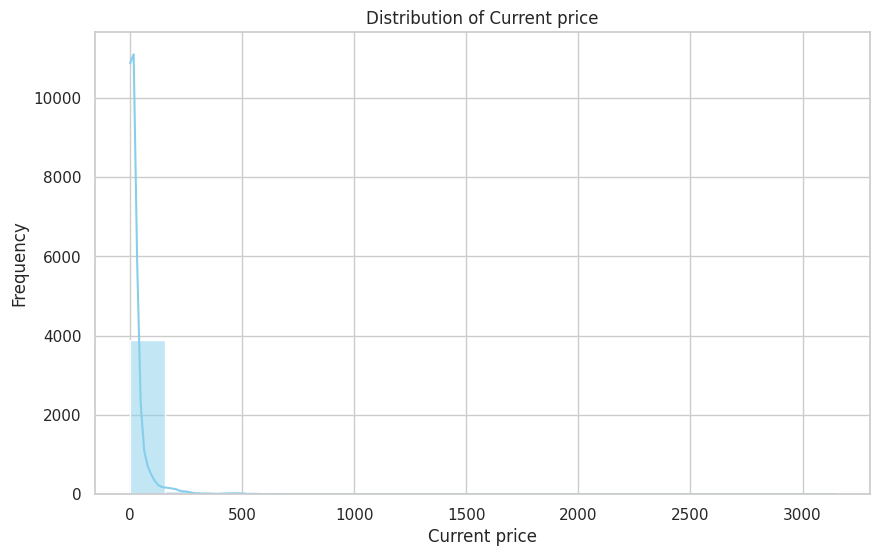

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a histogram of 'Current price'
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['Current price'], bins=20, kde=True, color='skyblue')
plt.xlabel('Current price')
plt.ylabel('Frequency')
plt.title('Distribution of Current price')
plt.show()



MAKING THE HISTOGRAM OF VOLUME WITH RESPECTIVE FREQUENCIES

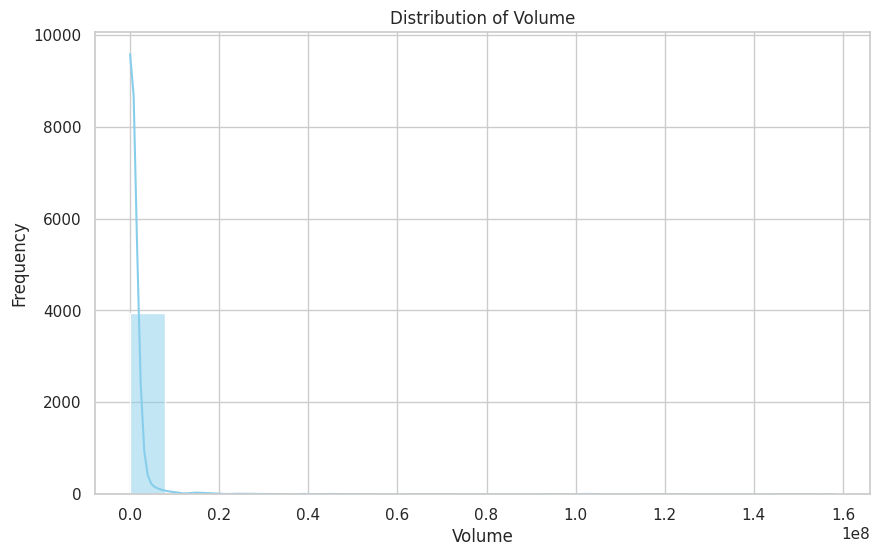

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a histogram of 'Volume'
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['Volume'], bins=20, kde=True, color='skyblue')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')
plt.show()



MAKING CORRELATION MATRIX

In [20]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Calculate the correlation matrix
correlation_matrix = stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']].corr()

# Interpretation
interpretation = [
    {"Metric": "Current price", "Interpretation": "Interpretation of Current price correlation."},
    {"Metric": "Change(%)", "Interpretation": "Interpretation of Change(%) correlation."},
    {"Metric": "Open", "Interpretation": "Interpretation of Open correlation."},
    {"Metric": "High", "Interpretation": "Interpretation of High correlation."},
    {"Metric": "Low", "Interpretation": "Interpretation of Low correlation."},
    {"Metric": "Volume", "Interpretation": "Interpretation of Volume correlation."}
]

# Convert the correlation matrix and interpretation to tabular format
correlation_table = tabulate(correlation_matrix, headers='keys', tablefmt='grid')
interpretation_table = tabulate(interpretation, headers='keys', tablefmt='grid')

# Print the correlation matrix and interpretation
print("Correlation Matrix:")
print(correlation_table)

print("\nInterpretation:")
print(interpretation_table)


Correlation Matrix:
+---------------+-----------------+-------------+-----------+------------+------------+-----------+
|               |   Current price |   Change(%) |      Open |       High |        Low |    Volume |
+===============+=================+=============+===========+============+============+===========+
| Current price |       1         |  -0.0408366 |  0.999919 |  0.999955  |  0.999961  | 0.0332194 |
+---------------+-----------------+-------------+-----------+------------+------------+-----------+
| Change(%)     |      -0.0408366 |   1         | -0.039462 | -0.0395735 | -0.0405688 | 0.124498  |
+---------------+-----------------+-------------+-----------+------------+------------+-----------+
| Open          |       0.999919  |  -0.039462  |  1        |  0.999958  |  0.999959  | 0.033446  |
+---------------+-----------------+-------------+-----------+------------+------------+-----------+
| High          |       0.999955  |  -0.0395735 |  0.999958 |  1         |  0.99

IDENTIFING OUTLIERS LIST ANF GRAPH IN RESPECT OF VOLUME

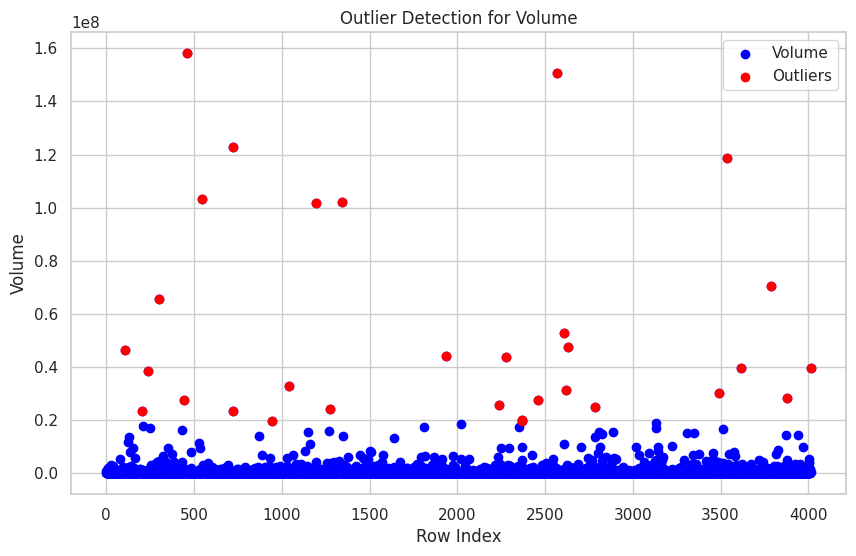

Number of Detected Outliers: 31

Outliers:
                               Name     Volume
460             AXCELLA HEALTH INC.  158129337
2569                   NIKOLA CORP.  150684908
722             CANOPY GROWTH CORP.  122823362
3539                     TESLA INC.  118559635
544                    BIOCEPT INC.  103239842
1343              EZGO TECHNOLOGIES  102160533
1194                      EBET INC.  101811045
3790            VERB TECHNOLOGY CO.   70520696
300                      APPLE INC.   65602066
2607  NOVO INTEGRATED SCIENCES INC.   52634597
2629                   NVIDIA CORP.   47389994
105     ADVANCED MICRO DEVICES INC.   46271558
1933                    INTEL CORP.   44265054
2278          MARATHON DIGITAL HLD.   43599180
3618             TILRAY BRANDS INC.   39800847
4014      ZYVERSA THERAPEUTICS INC.   39479583
239                 AMAZON.COM INC.   38365929
1042                      CSX CORP.   32686877
2620                  NUVASIVE INC.   31368558
3490             

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Calculate the Z-scores for the 'Volume' column
z_scores = np.abs(stats.zscore(stock_df['Volume']))

# Define a threshold for considering values as outliers
threshold = 3  # You can adjust this threshold as needed

# Identify outliers based on the threshold
outliers = np.where(z_scores > threshold)

# Get the rows with outlier Volume values
outlier_rows = stock_df.iloc[outliers]

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.scatter(stock_df.index, stock_df['Volume'], color='blue', label='Volume')
plt.scatter(outlier_rows.index, outlier_rows['Volume'], color='red', label='Outliers')
plt.xlabel('Row Index')
plt.ylabel('Volume')
plt.title('Outlier Detection for Volume')
plt.legend()
plt.show()

# Count the number of outliers
num_outliers = len(outlier_rows)

# Interpretation in tabular format
print(f"Number of Detected Outliers: {num_outliers}\n")
print("Outliers:")
print(outlier_rows[['Name', 'Volume']])


MAKING HEAT MAP OF CURRENT PRIVE AND VOLUME

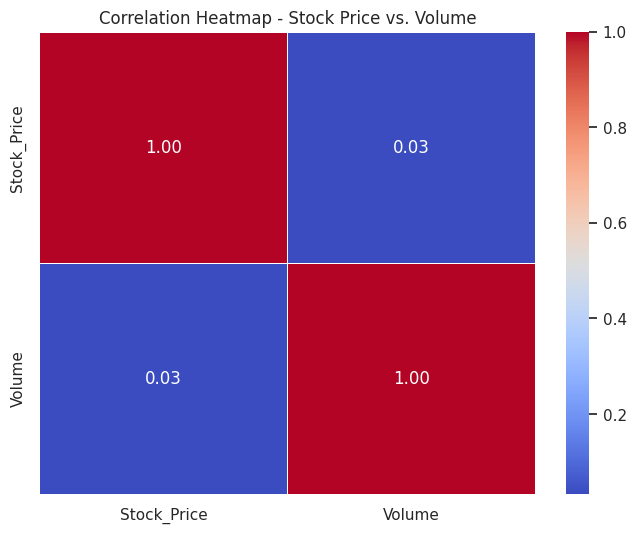

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Stock_Price': stock_df['Current price'],
    'Volume': stock_df['Volume']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Stock Price vs. Volume')
plt.show()

ANALYZING TOP 5 STOCK ON THE BASIS OF CURRENT PRICE AND CHANGE(%)

In [37]:
import pandas as pd

# Assuming your DataFrame has columns 'Stock', 'Change%', and 'Price'
# Replace these column names with the actual column names in your DataFrame

# Sort the DataFrame by 'Change%' in descending order and then by 'Price' in descending order
sorted_df_1 = stock_df.sort_values(by=['Current price'], ascending=[False])
sorted_df_2 = stock_df.sort_values(by=['Change(%)'], ascending=[False])

# Select the top 2 rows from the sorted DataFrame
top_5_stocks_1 = sorted_df_1.head(5)
top_5_stocks_2 = sorted_df_2.head(5)

# Display the top 2 stocks
print("top_5_stocks_1:", top_5_stocks_1)
print("")
print("top_2_stocks_2:", top_5_stocks_2)

from tabulate import tabulate

#By using data provided by the above code, we are makinh tables
# Sample data as a list of lists (rows)
data = [
    ["BOOKING HOLDINGS INC.", 3143.10, 1.28, 3115.00, 3147.94, 3108.43, 164419],
    ["MERCADOLIBRE INC.", 1428.19, 10.57, 1436.35, 1451.56, 1421.48, 509636],
    ["FIRST CITIZENS BANCSHARES INC.", 1326.54, 0.21, 1323.77, 1349.06, 1323.77, 42336],
    ["O REILLY AUTOMOTIVE INC.", 958.36, 1.33, 948.00, 959.23, 945.00, 479544],
    ["BROADCOM INC.", 857.55, 0.06, 855.00, 860.83, 850.12, 1681900]
]

# Define the headers for the table
headers = ["Name", "Current price", "Change(%)", "Open", "High", "Low", "Volume"]

# Use the tabulate function to format the data as a table
# You can specify the table format you want, e.g., "plain", "grid", "pipe", "html", etc.
table = tabulate(data, headers, tablefmt="grid")

# Print the formatted table
print(table)
from tabulate import tabulate

# Sample data for the second set of stocks as a list of lists (rows)
data2 = [
    ["PLUS THERAPEUTICS INC.", 1.380, 153.54, 3.160, 3.210, 1.240, 5677654],
    ["GROM SOCIAL ENTERPRISES INC.", 2.280, 143.70, 2.020, 2.380, 1.950, 4234509],
    ["RETO ECO-SOLUTIONS INC.", 0.620, 134.32, 0.932, 0.939, 0.499, 3227100],
    ["ARQIT QUANTUM INC.", 0.640, 133.33, 0.720, 0.720, 0.633, 9636525],
    ["FINTECH ECOSYSTEM DEVELOPMENT", 0.114, 132.94, 0.201, 0.201, 0.114, 7519]
]

# Define the headers for the second table
headers2 = ["Name", "Current price", "Change(%)", "Open", "High", "Low", "Volume"]

# Use the tabulate function to format the data as a table
# You can specify the table format you want, e.g., "plain", "grid", "pipe", "html", etc.
table2 = tabulate(data2, headers2, tablefmt="grid")

# Print the formatted table for the second set of stocks
print(table2)



top_5_stocks_1:                                 Name  Current price  Change(%)     Open  \
611            BOOKING HOLDINGS INC.        3143.10       1.28  3115.00   
2332               MERCADOLIBRE INC.        1428.19      10.57  1436.35   
1402  FIRST CITIZENS BANCSHARES INC.        1326.54       0.21  1323.77   
2634        O REILLY AUTOMOTIVE INC.         958.36       1.33   948.00   
649                    BROADCOM INC.         857.55       0.06   855.00   

         High      Low   Volume  
611   3147.94  3108.43   164419  
2332  1451.56  1421.48   509636  
1402  1349.06  1323.77    42336  
2634   959.23   945.00   479544  
649    860.83   850.12  1681900  

top_2_stocks_2:                                Name  Current price  Change(%)   Open   High  \
2895         PLUS THERAPEUTICS INC.          1.380     153.54  3.160  3.210   
1674   GROM SOCIAL ENTERPRISES INC.          2.280     143.70  2.020  2.380   
3106        RETO ECO-SOLUTIONS INC.          0.620     134.32  0.932  0.939

SELECTING THE TOP 100 STOCK ON BASIS OF VOLUME AND PRICE FROM ALL STOCK AVAILABLE

In [39]:
# Sort the DataFrame by 'Volume' in descending order
stock_df1 = stock_df.sort_values(by=['Volume'], ascending=False)
stock_df2 = stock_df.sort_values(by=['Current price'], ascending=False)

# Select the top 100 stocks based on trading volume
top_100_stocks_volume = stock_df1.head(100)
top_100_stocks_price = stock_df2.head(100)

# Convert the top 100 stocks DataFrame to a nicely formatted table
top_100_table_volume = tabulate(top_100_stocks_volume, headers='keys', tablefmt='pretty')
top_100_table_price = tabulate(top_100_stocks_price, headers='keys', tablefmt='pretty')

# Print the top 100 stocks table
print("Top 100 Stocks by Trading Volume:")
print(top_100_table_volume)
print("Top 100 Stocks by Trading Price:")
print(top_100_table_price)


Top 100 Stocks by Trading Volume:
+------+-------------------------------------+---------------+-----------+--------+--------+--------+-----------+
|      |                Name                 | Current price | Change(%) |  Open  |  High  |  Low   |  Volume   |
+------+-------------------------------------+---------------+-----------+--------+--------+--------+-----------+
| 460  |         AXCELLA HEALTH INC.         |     0.98      |   70.73   |  0.61  |  1.07  | 0.535  | 158129337 |
| 2569 |            NIKOLA CORP.             |     0.88      |  115.38   |  1.03  |  1.03  |  0.88  | 150684908 |
| 722  |         CANOPY GROWTH CORP.         |     0.932     |   22.63   | 0.751  | 0.959  |  0.74  | 122823362 |
| 3539 |             TESLA INC.              |     248.5     |   11.19   | 251.22 | 256.52 | 246.67 | 118559635 |
| 544  |            BIOCEPT INC.             |     1.34      |   59.52   |  1.58  |  1.85  |  1.22  | 103239842 |
| 1343 |          EZGO TECHNOLOGIES          |     0.2

SELECTINGTHE BOTTOM 100 STOCKS ON BASIS OF VOLUME AND PRICE FROM ALL STOCK AVAILABLE

In [40]:
# Sort the DataFrame by 'Volume' in descending order
stock_df3 = stock_df.sort_values(by=['Volume'], ascending=True)
stock_df4 = stock_df.sort_values(by=['Current price'], ascending=True)

# Select the top 100 stocks based on trading volume
bottom_100_stocks_volume = stock_df3.head(100)
bottom_100_stocks_price = stock_df4.head(100)

# Convert the top 100 stocks DataFrame to a nicely formatted table
bottom_100_table_volume = tabulate(bottom_100_stocks_volume, headers='keys', tablefmt='pretty')
bottom_100_table_price = tabulate(bottom_100_stocks_price, headers='keys', tablefmt='pretty')

# Print the top 100 stocks table
print("Bottom 100 Stocks by Trading Volume:")
print(bottom_100_table_volume)
print("Bottom 100 Stock by Trading Price:")
print(bottom_100_table_price)


Bottom 100 Stocks by Trading Volume:
+------+-----------------------------------------+---------------+-----------+-------+-------+-------+--------+
|      |                  Name                   | Current price | Change(%) | Open  | High  |  Low  | Volume |
+------+-----------------------------------------+---------------+-----------+-------+-------+-------+--------+
| 2043 |           KAIROUS ACQUISITION           |      1.0      |    0.0    |  1.0  |  1.0  |  1.0  |   1    |
| 1210 |              EDTECHX HLD.               |      1.0      |    0.0    |  1.0  |  1.0  |  1.0  |   1    |
| 407  |      ATLANTIC COASTAL ACQUISITION       |      1.0      |    0.0    |  1.0  |  1.0  |  1.0  |   1    |
| 2455 |       MOUNTAIN CREST ACQUISITION        |     10.76     |    0.0    | 10.76 | 10.76 | 10.76 |  100   |
| 816  |             CF ACQUISITION              |     10.55     |    0.0    | 10.55 | 10.55 | 10.55 |  100   |
| 2437 |     MONTEREY INNOVATION ACQUISITION     |     10.41     | 

MAKING THE SCATTER DIAGRAM OF VOLUME VS. PRICE WITH TREND LINE AND CALCULATING NUMBER OF OUTLIERS

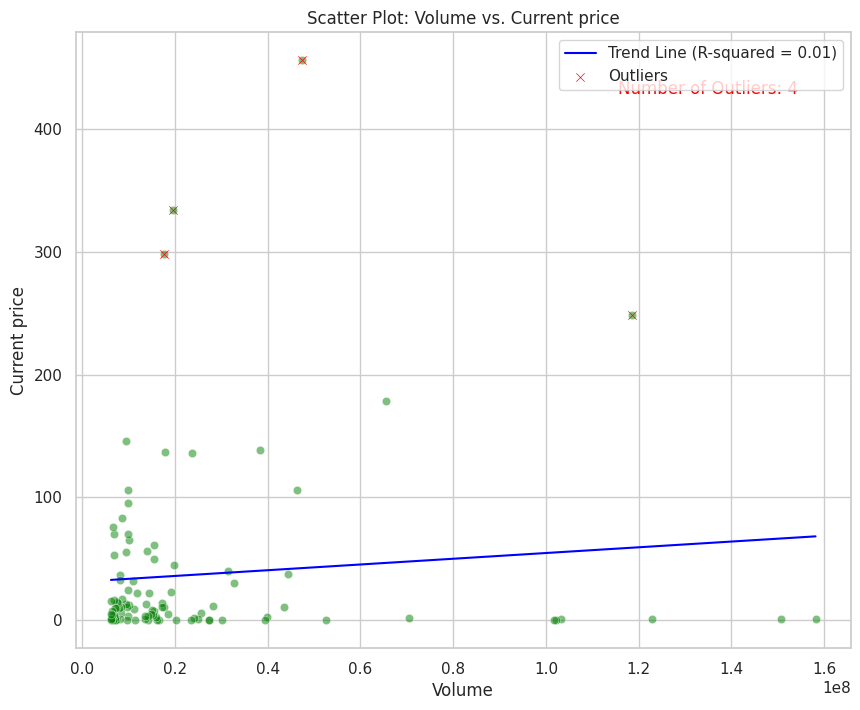

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Create a scatter plot of 'Volume' vs. 'Current price'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=top_100_stocks_volume, x='Volume', y='Current price', alpha=0.5, color='green')

# Add labels and a title
plt.xlabel('Volume')
plt.ylabel('Current price')
plt.title('Scatter Plot: Volume vs. Current price')

# Calculate the trend line (linear regression)
slope, intercept, r_value, p_value, std_err = stats.linregress(top_100_stocks_volume['Volume'], top_100_stocks_volume['Current price'])
x = np.array(top_100_stocks_volume['Volume'])
y_trend = slope * x + intercept

# Add the trend line to the plot
plt.plot(x, y_trend, color='blue', label=f'Trend Line (R-squared = {r_value**2:.2f})')

# Calculate and identify outliers based on residuals
residuals = top_100_stocks_volume['Current price'] - (slope * top_100_stocks_volume['Volume'] + intercept)
outliers = top_100_stocks_volume[np.abs(residuals) > 2 * np.std(residuals)]  # You can adjust the outlier threshold as needed

# Mark the outliers on the plot
sns.scatterplot(data=outliers, x='Volume', y='Current price', color='red', marker='x', label='Outliers')

# Show the number of outliers
num_outliers = len(outliers)
plt.text(0.7, 0.9, f'Number of Outliers: {num_outliers}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Show the plot with legend
plt.legend()
plt.show()

REGRESSION ANALYSIS OF VOLUME AND CURRENT PRICE

                            OLS Regression Results                            
Dep. Variable:          Current price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9318
Date:                Sun, 10 Sep 2023   Prob (F-statistic):              0.337
Time:                        07:31:55   Log-Likelihood:                -570.24
No. Observations:                 100   AIC:                             1144.
Df Residuals:                      98   BIC:                             1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4289      9.408      3.341      0.0

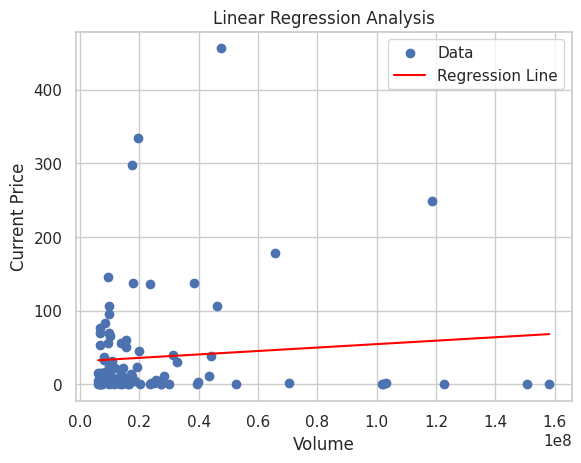

In [51]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import time

top_50_stocks = stock_df.head(50)

# Perform Linear Regression
X = top_100_stocks_volume['Volume']  # Independent variable (Volume)
X = sm.add_constant(X)  # Add a constant term to the model
y = top_100_stocks_volume['Current price']  # Dependent variable (Current price)

model = sm.OLS(y, X).fit()  # Fit the linear regression model
predictions = model.predict(X)  # Make predictions

# Print regression summary
print(model.summary())

# Visualize the regression line
plt.scatter(top_100_stocks_volume['Volume'], top_100_stocks_volume['Current price'], label='Data')
plt.plot(top_100_stocks_volume['Volume'], predictions, label='Regression Line', color='red')
plt.xlabel('Volume')
plt.ylabel('Current Price')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()

